<a href="https://colab.research.google.com/github/zh19980811/Automatic-Text-Processing-and-Image-Processing-itmo/blob/main/Task_4_Programmers_EN_students_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download everything we need

Ne need to download WordNet by means of NLTK.



In [1]:
import pandas as pd
import nltk
from nltk.corpus import wordnet as wn
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

## Prepare the data

We import the data from a prepared text file. The file contains the set of word pairs (just nouns), for which expert similarity estimates are known.

We make an associative array of "word pair - similarity estimate".

In [2]:
!wget 'https://courses.openedu.ru/assets/courseware/v1/e5d93a68121655b8f04aea15b89c130a/asset-v1:ITMOUniversity+AUTXTIMGPROCENG+spring_2023_ITMO_mag+type@asset+block/wordsim_similarity_goldstandard.txt'

--2024-05-04 23:57:58--  https://courses.openedu.ru/assets/courseware/v1/e5d93a68121655b8f04aea15b89c130a/asset-v1:ITMOUniversity+AUTXTIMGPROCENG+spring_2023_ITMO_mag+type@asset+block/wordsim_similarity_goldstandard.txt
Resolving courses.openedu.ru (courses.openedu.ru)... 178.248.235.109
Connecting to courses.openedu.ru (courses.openedu.ru)|178.248.235.109|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4002 (3.9K) [text/plain]
Saving to: ‘wordsim_similarity_goldstandard.txt’

wordsim_similarity_ 100%[===================>]   3.91K  --.-KB/s    in 0s      

2024-05-04 23:57:59 (1.23 GB/s) - ‘wordsim_similarity_goldstandard.txt’ saved [4002/4002]



In [3]:
with open("wordsim_similarity_goldstandard.txt", encoding="utf-8") as rf:
  triples = [line.strip().split("\t") for line in rf.readlines()]
  score_map = {tuple(triple[:2]): float(triple[2]) for triple in triples}

Note, that we took just expert similarity estimates from the original file and for nouns only. The original set is available [here](http://alfonseca.org/pubs/ws353simrel.tar.gz)

Let's have a look at similarity measure examples.

Some words can have several different meanings in WordNet. Here -- just as an example -- we will select the first one that comes across, but then we will work with them differently.




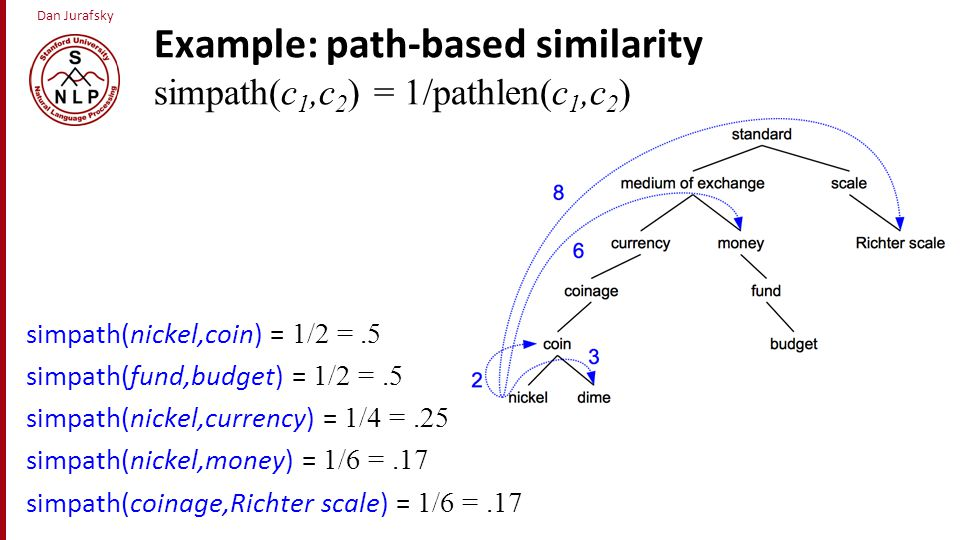

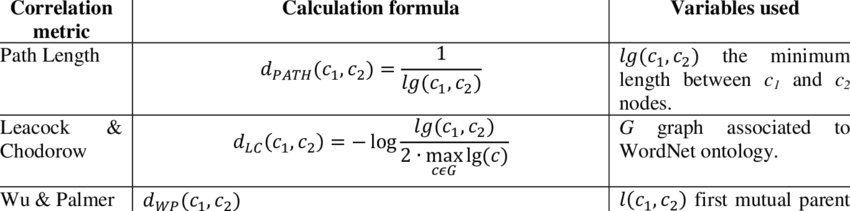

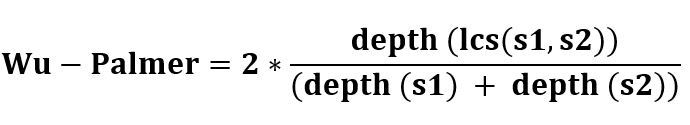

In [4]:
for w1, w2 in list(score_map)[:2]:

  print("\nWords: %s-%s\nGround truth score: %.2f" % (w1, w2, score_map[(w1, w2)]))

  ss1 = wn.synset(w1 + ".n.01")
  ss2 = wn.synset(w2 + ".n.01")

  print("\nPath: %.3f" % ss1.path_similarity(ss2), end=" ")
  print("\nwup: %.3f" % ss1.wup_similarity(ss2), end=" ")
  print("\nshortest_path: %.3f" % ss1.shortest_path_distance(ss2))


Words: tiger-cat
Ground truth score: 7.35

Path: 0.091 
wup: 0.545 
shortest_path: 10.000

Words: tiger-tiger
Ground truth score: 10.00

Path: 1.000 
wup: 0.750 
shortest_path: 0.000


Compute several similarity measures for all word pairs

In [5]:
from itertools import product


list_pairs = list(score_map)
wup_list, true_list, path_list = [], [], []

# for all pairs
for w1, w2 in list_pairs:

  try:
    all_w1 = wn.synsets(w1, pos="n")
    all_w2 = wn.synsets(w2, pos="n")

    # we add metrics of interest and expert reviews
    wup = max([item1.wup_similarity(item2) \
                for item1, item2 in product(all_w1, all_w2)])
    wup_list.append(wup)

    path = max([item1.path_similarity(item2) \
                for item1, item2 in product(all_w1, all_w2)])
    path_list.append(path)

    true_list.append(score_map[(w1, w2)])

  except Exception as e:
    print(w1, w2, "error:", e)

drink eat error: max() arg is an empty sequence
stock live error: max() arg is an empty sequence


## Calculate Spearman's rank correlation

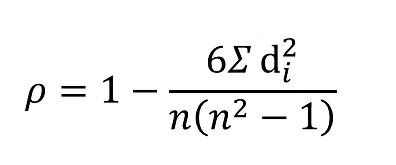

In [6]:
from scipy.stats import spearmanr


coef, p = spearmanr(wup_list, true_list)
print("wup  Spearman R: %.4f" % coef)

coef, p = spearmanr(path_list, true_list)
print("path Spearman R: %.4f" % coef)

wup  Spearman R: 0.6438
path Spearman R: 0.6176


In [28]:
data = pd.read_csv('/content/Task_4_sample_19.csv')
data.head()

,word_1,word_2,Score
0,doctor,personnel,5.00
1,street,children,4.94
2,word,similarity,4.75
3,architecture,century,3.78
4,asylum,madhouse,8.87


In [22]:
from nltk.corpus import wordnet as wn

# Access the synset for 'rock.n.01'
rock_synset = wn.synset('rock.n.01')

# Get the list of hyponyms
hyponyms = rock_synset.hyponyms()

# Count the hyponyms
number_of_hyponyms = len(hyponyms)

# Get the name of the first hyponym
first_hyponym_name = hyponyms[0].name() if hyponyms else 'None'

# Print the results
print( number_of_hyponyms)
print( first_hyponym_name)


17
achondrite.n.01
